6th row(4th last data) is modified to have the height lower by 1 mm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# change font to times new roman
plt.rcParams['font.family'] = 'Times New Roman'
# increase tick label size
plt.rcParams['xtick.labelsize'] = 12

In [3]:
# load the CSV 
df = pd.read_csv('Quickies.csv')
df.head(10)

,Current,B,B2,MSR,CSR,Height,Rise
0,0.02,0.040,0.001600,6.0,4,60.04,0.00
1,0.50,0.828,0.685584,6.0,21,60.21,0.17
2,1.00,1.693,2.866249,6.0,66,60.66,0.62
3,1.50,2.620,6.864400,6.1,40,61.40,1.36
4,2.00,3.540,12.531600,6.2,46,62.46,2.42
5,2.50,4.460,19.891600,6.4,82,63.82,3.78
6,3.00,5.360,28.729600,6.5,35,65.35,5.31
7,3.50,6.230,38.812900,6.7,1,67.01,6.97
8,4.00,7.070,49.984900,6.8,54,68.54,8.50


In [4]:
W1 = 44.7 #gm
W2 = 53.9 #gm
W3 = 60.0 #gm

# print relative density
Rho = (W3 - W1)/(W2 - W1)
print("Density of solution = %2.4f gm/cc"%(Rho))

Density of solution = 1.6630 gm/cc


In [5]:
I = df['Current']
H = df['B']

# fit the data to a line
fit = np.polyfit(I,H,1)

# print the slope and intercept
print("Slope = %2.4f"%(fit[0]))
print("Intercept = %2.4f"%(fit[1]))

Slope = 1.7882
Intercept = -0.0424


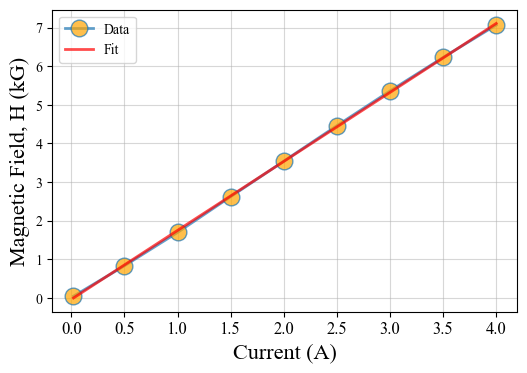

In [6]:
I = df['Current']
H = df['B']

plt.figure(figsize=(6, 4), dpi=100)
plt.plot(I, H, 'o-', ms=12, lw=2, alpha=0.7, mfc='orange', label='Data')
# plot the fit
plt.plot(I,np.polyval(fit, I), 'r-', lw=2, alpha=0.7, label='Fit')

plt.legend()

plt.grid(alpha=0.5)
plt.xlabel('Current (A)', fontsize=16)
plt.ylabel('Magnetic Field, H (kG)', fontsize=16)
plt.savefig('Quinkies_calibration.jpg', dpi=300, bbox_inches='tight')

In [7]:
# plot B2 vs Rise
B2 = df['B2']
h = df['Rise']


# fit a linear model to the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(B2.values.reshape(-1, 1), h.values.reshape(-1, 1))
print('Slope = ',model.coef_[0][0])
print('Intercept = ',model.intercept_[0])
print('Fitness Score = ', model.score(B2.values.reshape(-1, 1), h.values.reshape(-1, 1)))

Slope =  0.1726421743987721
Intercept =  0.16040500243957734
Fitness Score =  0.9972184342139805


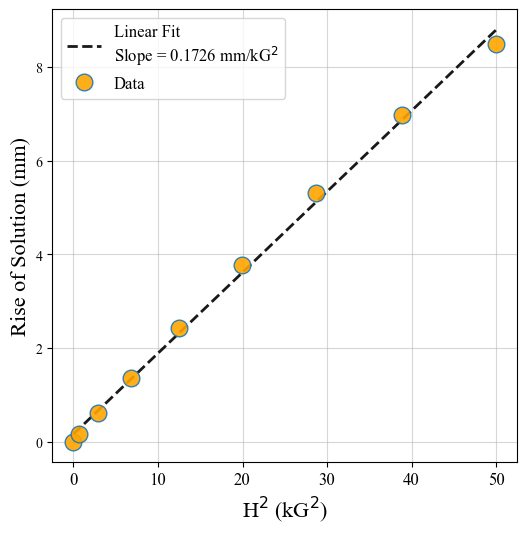

In [8]:
# plot the data and model

plt.figure(figsize=(6, 6), dpi=100)

#plot the model
x = np.linspace(0, 50, 100)
y = model.coef_[0][0] * x + model.intercept_[0]
plt.plot(x, y, 'k--', lw=2, alpha=0.9, label='Linear Fit\nSlope = {:.4f} mm/kG$^2$'.format(model.coef_[0][0]))

# plot the data
plt.plot(B2, h, 'o', ms=12, lw=2, alpha=0.9, mfc='orange', label='Data')


plt.legend(fontsize=12)

plt.grid(alpha=0.5)
plt.xlabel('H$^2$ (kG$^2$)', fontsize=16)
plt.ylabel('Rise of Solution (mm)', fontsize=16)
plt.savefig('Rise.jpg', dpi=300, bbox_inches='tight')

In [9]:
# print slope in required units
print('Slope = %2.4f x 10^(-7) cm/G'%model.coef_[0][0])

# print magnetic suseptibility in CGS units
print('Magnetic Susceptibility = %2.4f x 10^(-7)'%(model.coef_[0][0] *2*Rho * 980) )

# print magnetic suseptibility/density in CGS units
print('Magnetic Susceptibility/density = %2.4f x 10^(-6)'%(model.coef_[0][0] *2*Rho * 980 / (10*Rho)) )
Chi_p_sol = model.coef_[0][0] *2*Rho * 980 / (10*Rho)

# print magnetic suseptibility of Salt
Chi_water = -0.72*10**(-6) # cm/G
m_w = W2 - W1 # gm
m_s = W3 - W2 # gm

Chi_salt = (Chi_p_sol - (Chi_water * m_w /(m_w + m_s)))*(m_w + m_s)/m_s
print('Magnetic Susceptibility of Salt = %2.4f x 10^(-6)'%(Chi_salt))

# print magnetic suseptibility' of Salt
MM_salt = 169 # g/mol
print('Magnetic Susceptibility of Salt = %2.4f x 10^(-6)'%(Chi_salt*MM_salt))
Chi_p_salt = Chi_salt*MM_salt

Accepted = 14200

# print percentage error
print('Percentage Error = %2.4f %%'%(( Chi_p_salt - Accepted)/Accepted * 100))




Slope = 0.1726 x 10^(-7) cm/G
Magnetic Susceptibility = 562.7384 x 10^(-7)
Magnetic Susceptibility/density = 33.8379 x 10^(-6)
Magnetic Susceptibility of Salt = 84.8720 x 10^(-6)
Magnetic Susceptibility of Salt = 14343.3724 x 10^(-6)
Percentage Error = 1.0097 %


# Data

In [10]:
# print Data

print("\nCurrent")
#print the values of current separated by commas
print(','.join([str(i) for i in df['Current'].values]))

print("\nMagnetic Field")
#print the values of magnetic field separated by commas
print(','.join([str(i) for i in df['B'].values]))

# print MSR
print("\nMSR")
#print the values of MSR separated by commas
print(','.join([str(i) for i in df['MSR'].values]))

# print CSR
print("\nCSR")
#print the values of CSR separated by commas
print(','.join([str(i) for i in df['CSR'].values]))


Current
0.02,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0

Magnetic Field
0.04,0.828,1.693,2.62,3.54,4.46,5.36,6.23,7.07

MSR
6.0,6.0,6.0,6.1,6.2,6.4,6.5,6.7,6.8

CSR
4,21,66,40,46,82,35,1,54
